In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.stats import ttest_ind
import numpy as np

In [25]:
data_df = pd.read_csv('Score_df.csv')
data_df.head(3)

,dataset,filename,age,languages,is_bilingual,plain_utterances,kf_ease,kf_ease_avg
0,English_Bilingual_Grade2_Audio,11221425.cha,"[(8, 3, 0)]",{'eng'},True,['the boy and the dog were looking at the frog...,"[0.0, 0.0, 121.22000000000003, 121.22000000000...",81.504834
1,English_Bilingual_Grade2_Audio,11222306.cha,"[(7, 9, 0)]",{'eng'},True,['one night the boy and the dog were looking a...,"[0.0, 0.0, 121.22000000000003, 121.22000000000...",81.489080
2,English_Bilingual_Grade2_Audio,21121223.cha,"[(7, 3, 0)]",{'eng'},True,"[""there's POSTCLITIC a boy playing with a dog ...","[0.0, 0.0, 121.22000000000003, 121.22000000000...",79.802621


In [26]:
grouped_df = data_df.groupby('dataset').describe()

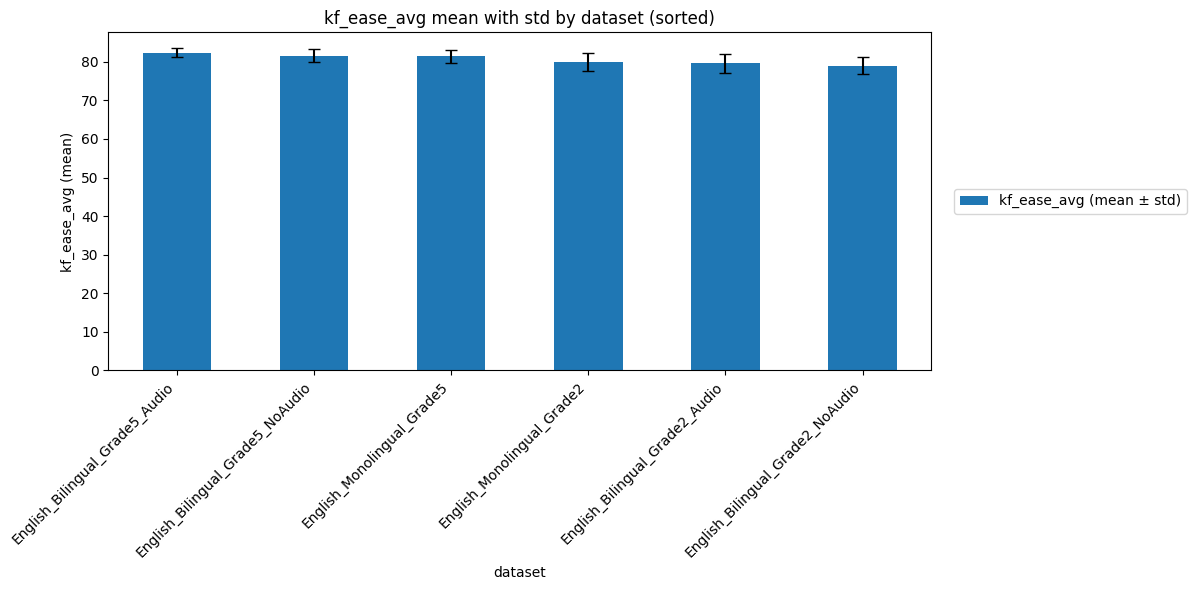

In [27]:
def make_plot(column_name, ascending=False):
    means = grouped_df[(column_name, 'mean')]
    stds = grouped_df[(column_name, 'std')]
    df_plot = pd.DataFrame({'mean': means, 'std': stds}).sort_values('mean', ascending=ascending)

    fig, ax = plt.subplots(figsize=(14,6))
    df_plot['mean'].plot(kind='bar', yerr=df_plot['std'], capsize=4, ax=ax, color='C0', label=f'{column_name} (mean ± std)')

    ax.set_ylabel(f'{column_name} (mean)')
    ax.set_title(f'{column_name} mean with std by dataset (sorted)')
    ax.set_xticklabels(df_plot.index, rotation=45, ha='right')

    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# Sort descending by default (highest mean first). Set ascending=True for lowest-first.
make_plot("kf_ease_avg", ascending=False)

In [20]:
comparison_en = pd.DataFrame({
    "Group": ["English Monolingual", "English Bilingual","Spanish Monolingual", "Spanish Bilingual"],
    "N samples": [len(df_en_mono), len(df_en_bi),len(df_es_mono), len(df_es_bi)],
    "Mean": [df_en_mono.mean(), df_en_bi.mean(), df_es_mono.mean(), df_es_bi.mean()],
    "Std": [df_en_mono.std(), df_en_bi.std(), df_es_mono.std(),df_es_bi.std()]
})
comparison_en

NameError: name 'df_es_mono' is not defined

In [15]:


groups = ["EN Mono", "EN Bi", "ES Mono", "ES Bi"]
means = [
    df_en_mono.mean(),
    df_en_bi.mean(),
    df_es_mono.mean(),
    df_es_bi.mean()
]
stds = [
    df_en_mono.std(),
    df_en_bi.std(),
    df_es_mono.std(),
    df_es_bi.std()
]

plt.figure(figsize=(10,6))
bars = plt.bar(groups, means, yerr=stds, capsize=6)

plt.ylabel("Reading scores (KF for EN, FH for ES)")
plt.title("Mean Readability by Group (Monolingual vs Bilingual)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



NameError: name 'df_en_mono' is not defined

In [ ]:

# simnple t-test and effect size
def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.std()**2 + b.std()**2)/2)

def print_group_stats(name, group1, group2):
    t_res = ttest_ind(group1, group2, equal_var=False)
    d = cohens_d(group1, group2)

    print(f"\n{name}")
    print(f"t-test:        t = {t_res.statistic:.3f}, p = {t_res.pvalue:.3e}")
    print(f"Cohen's d:     d = {d:.3f}")

print_group_stats("English tests", df_en_mono, df_en_bi)
print_group_stats("Spanis htests", df_es_mono, df_es_bi)



English tests
t-test:        t = 9.170, p = 5.901e-15
Cohen's d:     d = 1.227

Spanis htests
t-test:        t = 0.605, p = 5.480e-01
Cohen's d:     d = 0.117
